# Feed-forward network a.k.a. Multi-layer perceptron
- scikit-learn v0.18에서 서로 추가된 함수
- sklearn.neural_network에 supervised learning 알고리즘으로 MLPClassifier와 MLPRegressor, 그리고 unsupervised learning 알고리즘으로 BernoulliRBM (Bernoulli Restricted Boltzmann Machine)이 추가되었음

## 1. Wisconsin Breast Cancer problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

### Load dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head(10)

,Code,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
# !pip install missingno

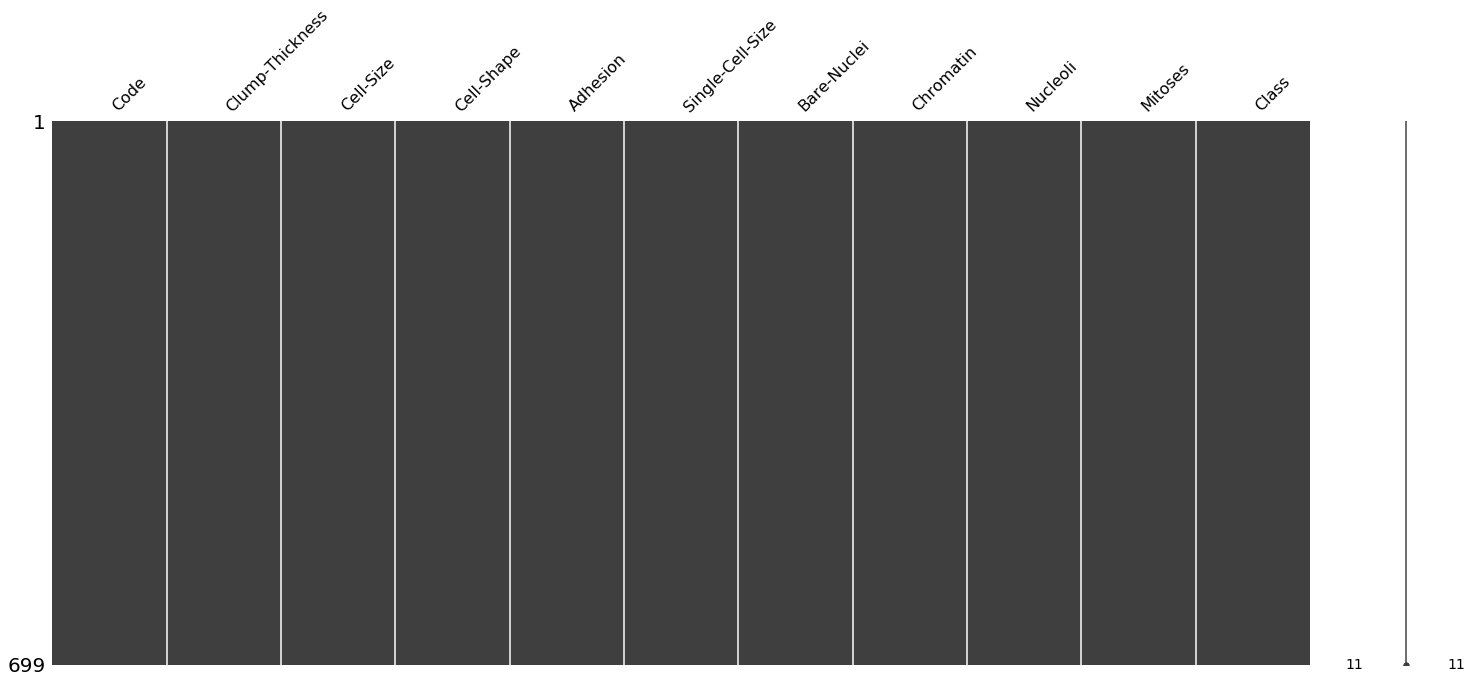

In [5]:
import missingno
missingno.matrix(dataset)

In [6]:
dataset.dtypes # object는 숫자형이 아닌 자료형.

Code                 int64
Clump-Thickness      int64
Cell-Size            int64
Cell-Shape           int64
Adhesion             int64
Single-Cell-Size     int64
Bare-Nuclei         object
Chromatin            int64
Nucleoli             int64
Mitoses              int64
Class                int64
dtype: object

In [7]:
# delete code
dataset.drop('Code', axis=1, inplace=True)
# Bare-Nuclei 중간에 물음표들이 있네
# mark ? as NaN
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].replace('?', np.NaN)

In [8]:
dataset.dtypes
# 왜 아직도 Bare-Nuclei가 object인가?
# 소수점 자료 때문. 처리 필요. 아래에서 float으로 바꾸는 작업을 해 줌

Clump-Thickness      int64
Cell-Size            int64
Cell-Shape           int64
Adhesion             int64
Single-Cell-Size     int64
Bare-Nuclei         object
Chromatin            int64
Nucleoli             int64
Mitoses              int64
Class                int64
dtype: object

In [9]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# names = ['Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
# dataset = pd.read_csv(url, names=names)

# # delete code
# dataset.drop('Code', axis=1, inplace=True)
# # mark ? as NaN
# dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].replace('?', np.NaN)
# Convert the type of 'Bare-Nuclei' column as float
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].astype(float)
# Drop NaN
dataset.dropna(axis=0, how='any', inplace=True) # pd에서 제공하는 na 삭제 함수

dataset.head(5)

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [10]:
dataset.dtypes # 깔끔

Clump-Thickness       int64
Cell-Size             int64
Cell-Shape            int64
Adhesion              int64
Single-Cell-Size      int64
Bare-Nuclei         float64
Chromatin             int64
Nucleoli              int64
Mitoses               int64
Class                 int64
dtype: object

### Preparation

In [11]:
# Split-out test dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
test_size = 0.20
seed = 15
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [12]:
print(X_train.shape)
print(X_test.shape)

(546, 9)
(137, 9)


In [31]:
#SVM
from sklearn.svm import SVC

In [34]:
svc = SVC(C=1.0, kernel = 'rbf', gamma = 0.01)
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9635036496350365
              precision    recall  f1-score   support

         2.0       0.99      0.95      0.97        81
         4.0       0.93      0.98      0.96        56

   micro avg       0.96      0.96      0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



In [13]:
# MLPClassifier는 NN을 학습하는 함수
# 활성함수는 relu가 default

clf = MLPClassifier(hidden_layer_sizes=(9, 9), # 은닉층 9개, 9개로 두 층
                    learning_rate_init=0.005,
                    max_iter=300,
                    random_state=1234,
                    verbose=1) # verbose는 학습이 되고 있는 과정을 프린트 해 줌

In [14]:
clf.fit(X_train, Y_train)

Iteration 1, loss = 1.04238087
Iteration 2, loss = 0.78684476
Iteration 3, loss = 0.71554017
Iteration 4, loss = 0.67658986
Iteration 5, loss = 0.61031296
Iteration 6, loss = 0.54524678
Iteration 7, loss = 0.50749856
Iteration 8, loss = 0.48147565
Iteration 9, loss = 0.45216261
Iteration 10, loss = 0.42064499
Iteration 11, loss = 0.39593011
Iteration 12, loss = 0.37715183
Iteration 13, loss = 0.35846660
Iteration 14, loss = 0.33793893
Iteration 15, loss = 0.32000403
Iteration 16, loss = 0.30413735
Iteration 17, loss = 0.28854751
Iteration 18, loss = 0.27337117
Iteration 19, loss = 0.25890200
Iteration 20, loss = 0.24790713
Iteration 21, loss = 0.23855959
Iteration 22, loss = 0.23042066
Iteration 23, loss = 0.22260681
Iteration 24, loss = 0.21517898
Iteration 25, loss = 0.20839393
Iteration 26, loss = 0.20235908
Iteration 27, loss = 0.19689769
Iteration 28, loss = 0.19278871
Iteration 29, loss = 0.18806686
Iteration 30, loss = 0.18463313
Iteration 31, loss = 0.18036911
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 9), learning_rate='constant',
       learning_rate_init=0.005, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [15]:
Y_train_hat = clf.predict(X_train)
Y_test_hat = clf.predict(X_test)

In [16]:
from sklearn import metrics

In [17]:
print(metrics.classification_report(Y_train, Y_train_hat))

              precision    recall  f1-score   support

         2.0       0.98      0.98      0.98       363
         4.0       0.97      0.96      0.96       183

   micro avg       0.97      0.97      0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546



In [18]:
print(metrics.classification_report(Y_test, Y_test_hat))

              precision    recall  f1-score   support

         2.0       0.91      0.99      0.95        81
         4.0       0.98      0.86      0.91        56

   micro avg       0.93      0.93      0.93       137
   macro avg       0.94      0.92      0.93       137
weighted avg       0.94      0.93      0.93       137



# k-fold cross validation

In [19]:
from sklearn.model_selection import GridSearchCV

### RF로 실습

In [20]:
# Random Forest를 GridSearchCV로 학습하기
from sklearn.ensemble import RandomForestClassifier


In [21]:
?RandomForestClassifier

하이퍼파라미터 선언

In [22]:
params = {'n_estimators':[50, 75, 100],
         'max_features':[5, 7]}

모델 학습

In [23]:
rf = GridSearchCV(estimator = RandomForestClassifier(random_state = 123),
                 param_grid=params,
                 cv = 5,
                 verbose = 1) # verbose는 학습과정을 보여주는 것

In [24]:
rf.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 75, 100], 'max_features': [5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

테스트

In [25]:
Y_pred = rf.predict(X_test)

In [26]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9416058394160584


In [27]:
rf.cv_results_

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*

{'mean_fit_time': array([0.04019995, 0.06079998, 0.07819996, 0.0408    , 0.06259995,
        0.08280005]),
 'std_fit_time': array([0.00193893, 0.00193911, 0.00116616, 0.00074843, 0.00185481,
        0.0026382 ]),
 'mean_score_time': array([0.00400004, 0.00539994, 0.00719991, 0.00359993, 0.0052001 ,
        0.00700002]),
 'std_score_time': array([0.00063249, 0.00048988, 0.00039999, 0.00079998, 0.00040009,
        0.00063249]),
 'param_max_features': masked_array(data=[5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 75, 100, 50, 75, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 5, 'n_estimators': 50},
  {'max_features': 5, 'n_estimators': 75},
  {'max_features': 5, 'n_estimators': 100},
  {'max_features': 7, 'n_estimators': 50},
  {'max_features': 7, 'n_es

In [28]:
rf.best_params_

{'max_features': 5, 'n_estimators': 50}

In [29]:
rf.best_score_

0.967032967032967

### Neural Network로 실습

In [41]:
params = {
    'activation': ['logistic', 'tanh', 'relu'], # 활성함수 종류
    'hidden_layer_sizes': [(9,), (9, 9)]
}

In [48]:
gridsearch = GridSearchCV(estimator=MLPClassifier(max_iter=300),
                          param_grid=params,
                          cv=5,
                          verbose=1, n_jobs = -1) # n_jobs는 일을 집중하게 해서 빨리 돌리는 것

In [49]:
gridsearch.fit(X_train, Y_train)
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers. 4개로 돌린다고 나옴

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.7s finished
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'activation': ['logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(9,), (9, 9)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [50]:
gridsearch.cv_results_

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*

{'mean_fit_time': array([0.26699996, 0.33619995, 0.27780004, 0.39599996, 0.31719985,
        0.40419998]),
 'std_fit_time': array([0.02785677, 0.00696852, 0.00868103, 0.0308351 , 0.05406815,
        0.03588535]),
 'mean_score_time': array([0.00100007, 0.00019999, 0.0006    , 0.00019999, 0.00040002,
        0.00039997]),
 'std_score_time': array([1.16800773e-07, 3.99971008e-04, 4.89901382e-04, 3.99971008e-04,
        4.89920847e-04, 4.89862441e-04]),
 'param_activation': masked_array(data=['logistic', 'logistic', 'tanh', 'tanh', 'relu', 'relu'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(9,), (9, 9), (9,), (9, 9), (9,), (9, 9)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': 'logistic', 'hidden_layer_sizes': (9,)},
  {'activation': 'logistic', 'hidden_layer_sizes': (9, 9)},


In [45]:
gridsearch.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (9, 9)}

In [46]:
gridsearch.best_score_

0.9652014652014652

In [47]:
gridsearch.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
Y_train_hat = gridsearch.predict(X_train)
Y_test_hat = gridsearch.predict(X_test)

In [42]:
print(metrics.classification_report(Y_train, Y_train_hat))

             precision    recall  f1-score   support

        2.0       0.98      0.96      0.97       363
        4.0       0.93      0.96      0.94       183

avg / total       0.96      0.96      0.96       546



In [43]:
print(metrics.classification_report(Y_test, Y_test_hat))

             precision    recall  f1-score   support

        2.0       0.91      0.95      0.93        81
        4.0       0.92      0.86      0.89        56

avg / total       0.91      0.91      0.91       137



### Learn MLP-classifier model

In [ ]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 5
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [ ]:
models = []
models.append(('MLP', MLPClassifier()))
models.append(('ScaledMLP_v1', Pipeline([('Scaler', MinMaxScaler(feature_range=(0,1))),('MLP', MLPClassifier())])))
models.append(('ScaledMLP_v2', Pipeline([('Scaler', MinMaxScaler(feature_range=(-1,1))),('MLP', MLPClassifier())])))

In [ ]:
models

In [ ]:
results = []
names = []
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
results

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
models[0]

In [ ]:
from sklearn.externals import joblib
joblib.dump(models[0], 'MLP.pkl')

In [ ]:
test_model = joblib.load('MLP.pkl')
print(test_model)

In [ ]:
test_model = test_model[1]
print(test_model)

In [ ]:
test_model.predict(new_case)

### Search parameters
- 자세한 사항: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- hidden_layer_sizes (number of hidden nodes in each hidden layer, type: tuple)
- activation (activation function for the hidden layer): 'logistic', 'tanh', 'relu', 'identity'
- solver (strategies for learning weights) : 'lbfgs, 'sgd', 'adam'

## 2. MNIST data
- Visualization of MLP weights on MNIST (http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()